# 3D deformation of a sphere

**TODO:** description

In [1]:
from advectionplot import *

# Error convergence of the phase indicator  

# Convergence rate for $\frac{|V(t_0) - V_e|}{V_e}$,  $V(t_0) := \sum_{c \in C} \alpha_c |\Omega_c|$,  $V_e$ is the exact volume. 

**Note**: the exact volume is not read from system/fvSolution, sphere of $R=0.15$ is used here and needs to match system/fvSolution.

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


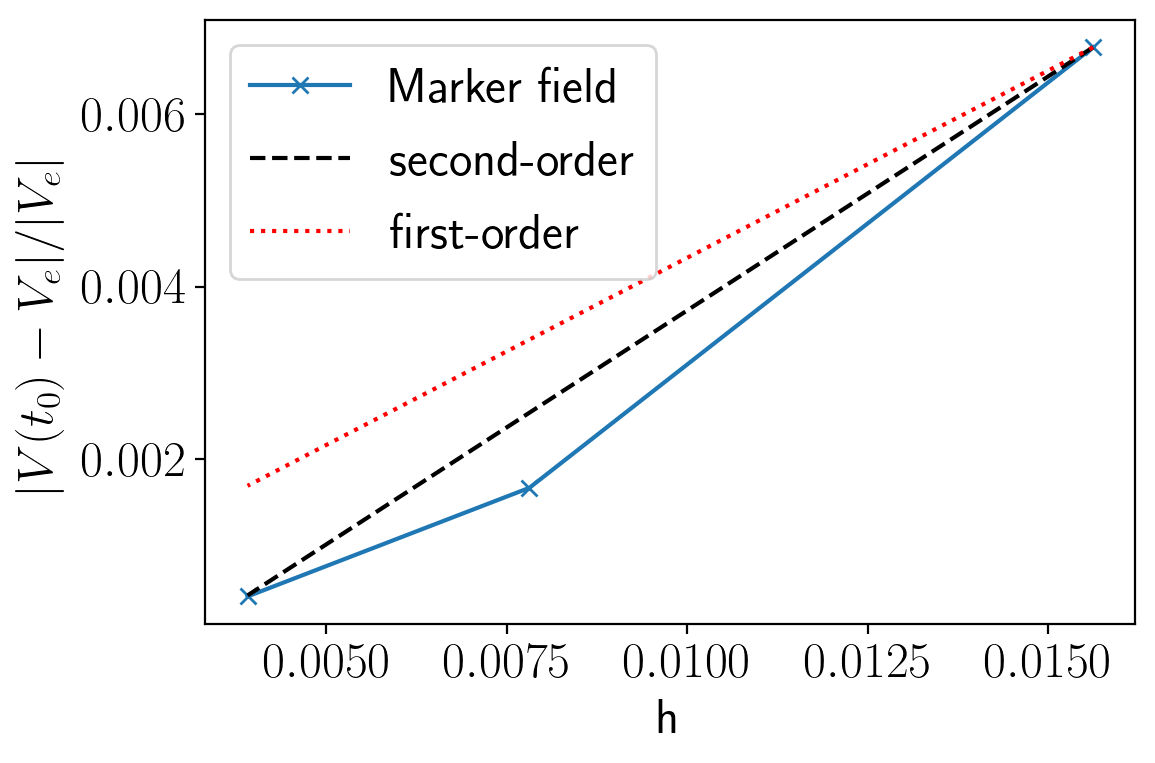

In [2]:
marker_dframe = agglomerate_dframe(csv_filename="leiaSetFields.csv",
                                   study_pattern="3Ddeformation",
                                   dframe_name="marker")

R = 0.15 # From the test case definition 
V_e = 4*R**3 * pi / 3.
volume_error = abs(marker_dframe["VOL_ALPHA_0"] - V_e) / V_e

plt.plot(marker_dframe["H"], volume_error, '-x', label="Marker field")
h_01 = [marker_dframe["H"].iloc[0],marker_dframe["H"].iloc[-1]]
error2nd_01 = [volume_error.iloc[0], 
            volume_error.iloc[0]*(h_01[1]/h_01[0])**2]
error1st_01 = [volume_error.iloc[0], 
            volume_error.iloc[0]*(h_01[1]/h_01[0])]
plt.plot(h_01,error2nd_01,"k--",label="second-order")
plt.plot(h_01,error1st_01,"r:",label="first-order")
plt.ylabel("$|V(t_0) - V_e|/|V_e|$")
plt.xlabel("h")
plt.legend()
plt.savefig("3Ddeformation-phase-indicator-error-t0.pdf", bbox_inches="tight")

# Ev - volume conservation error 

# $$E_v(t)  = \frac{\left|\sum_{c \in C}\alpha_c(t)|\Omega_c| - \sum_{c \in C} \alpha_c(t_0)|\Omega_c|\right|}{\left|\sum_{c \in C} \alpha_c(t_0)|\Omega_c|\right|}$$

# Eg - L1 Geomeric error 

# $$E_g = \sum_{c \in C} |\Omega_c||\alpha_c(t_e) - \alpha_c(t_0)|$$


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/usr/lib/python3/dist-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


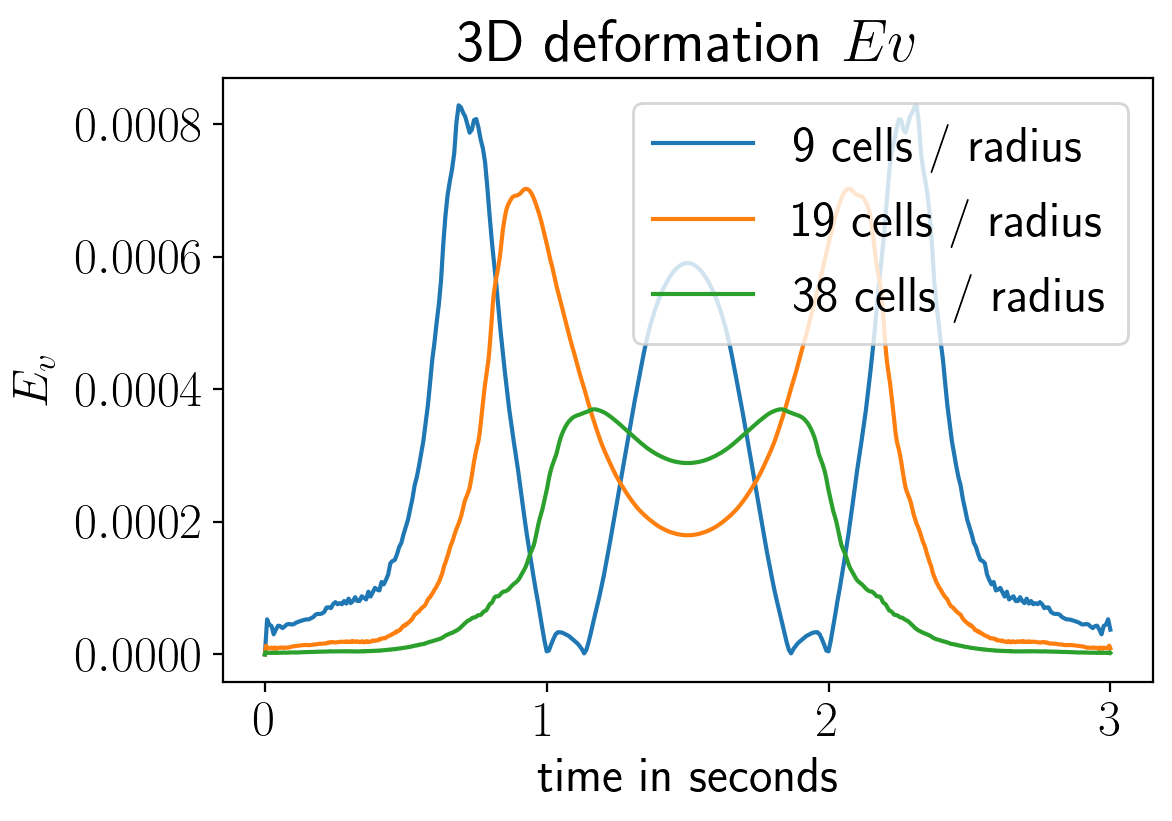

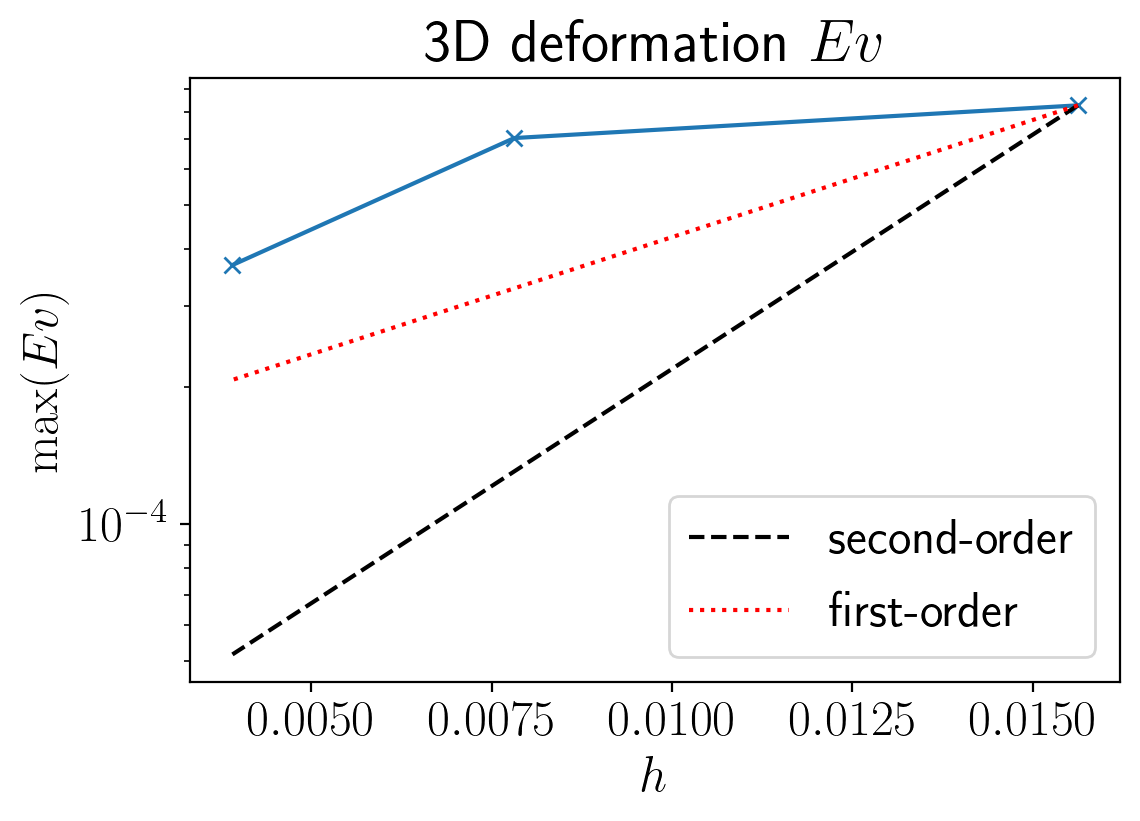

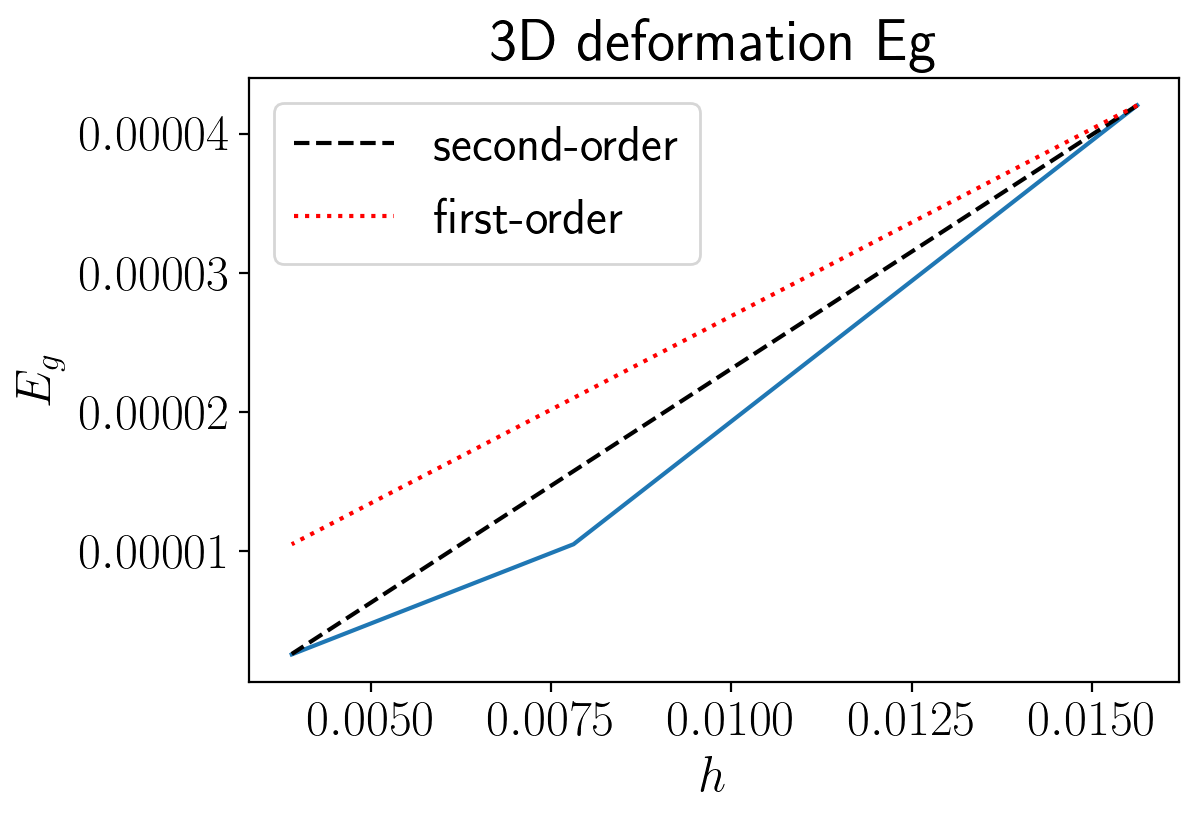

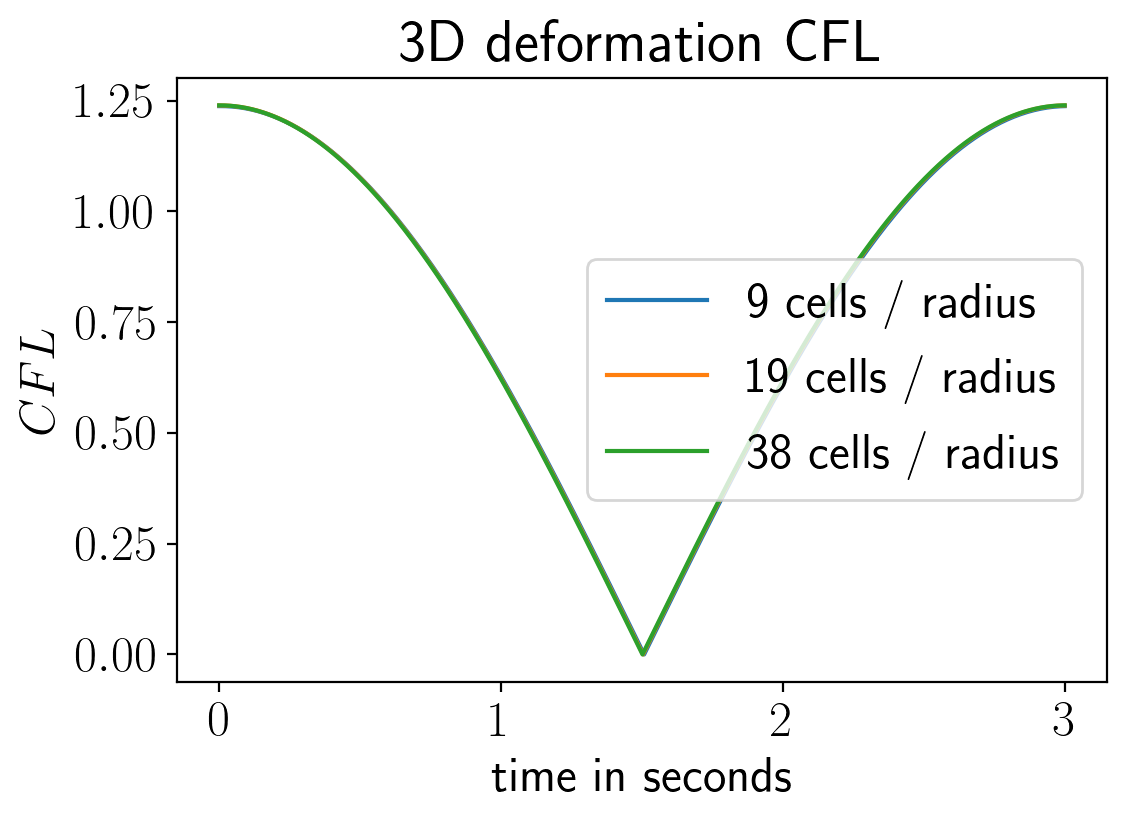

In [3]:
advection_dframe = agglomerate_dframe(csv_filename="leiaLevelSetFoam.csv",
                                   study_pattern="3Ddeformation",
                                   dframe_name="marker")

advection_dframe.to_csv("3Ddeformation-dframe.csv")
plot_advection_errors(advection_dframe, R, "3D deformation")